## Observations and Insights 

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import pprint as pp
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_results=pd.merge(mouse_metadata,study_results)
# Display the data table for preview
merged_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [31]:
#Locate duplicate mouse ID based on Mouse ID and Timepoint
duplicate_mouse_ids = merged_results.loc[merged_results.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids
    

array(['g989'], dtype=object)

In [32]:
#All data associated with the duplicated MouseID
duplicate_mouse_data = merged_results.loc[merged_results["Mouse ID"] == "g989"]
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [33]:
#New Dataset with duplicates removed
clean_df= merged_results.drop_duplicates(subset=["Mouse ID", "Timepoint"])
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [34]:
# Checking the number of mice.
unique_mice=clean_df["Mouse ID"].unique
mice_count=len(str(unique_mice))
mice_count

218

In [35]:
#generate summary statistics
clean_df.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000
mean,12.792903,25.661547,19.597458,50.449276,1.023835
std,7.186737,3.926776,14.084762,8.904565,1.138507
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951421,1.000000
75%,20.000000,29.000000,30.000000,56.324075,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


## Summary Statistics

In [36]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.


In [37]:
mean_df=merged_results.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
pd.DataFrame(mean_df)

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565
Placebo,54.033581
Propriva,52.322552
Ramicane,40.216745
Stelasyn,54.233149


In [38]:
std_df=merged_results.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
pd.DataFrame(std_df)

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,4.994774
Ceftamin,6.268188
Infubinol,6.567243
Ketapril,8.279709
Naftisol,8.134708
Placebo,7.821003
Propriva,6.507770
Ramicane,4.846308
Stelasyn,7.710419


In [39]:
median_df=merged_results.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
pd.DataFrame(median_df)

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,41.557809
Ceftamin,51.776157
Infubinol,51.820584
Ketapril,53.698743
Naftisol,52.509285
Placebo,52.288934
Propriva,50.854632
Ramicane,40.673236
Stelasyn,52.431737


In [40]:
var_df=merged_results.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
pd.DataFrame(var_df)

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,24.947764
Ceftamin,39.290177
Infubinol,43.128684
Ketapril,68.553577
Naftisol,66.173479
Placebo,61.168083
Propriva,42.351070
Ramicane,23.486704
Stelasyn,59.450562


In [41]:
sem_df=merged_results.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
pd.DataFrame(sem_df)

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,0.329346
Ceftamin,0.469821
Infubinol,0.492236
Ketapril,0.603860
Naftisol,0.596466
Placebo,0.581331
Propriva,0.512884
Ramicane,0.320955
Stelasyn,0.573111


In [42]:
 clean_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [43]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
summary_table =pd.DataFrame({"Mean Tumor Volume":mean_df,
                "Median Tumor Volume":median_df,
                "Tumor Volume Variance":var_df,
                 "Tumor Volume Std. Dev.":std_df,
                 "Tumor Volume Std. Err.":sem_df})
summary_table




,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Text(0.5, 1.0, 'Tumor Volume Summary')

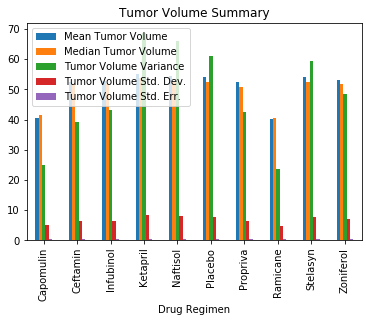

In [44]:
#Plot data points for each treatment
summary=summary_table.plot(kind="bar")
summary
summary.set_title("Tumor Volume Summary")

## Bar and Pie Charts

In [45]:
mice_per_regimen=clean_df["Drug Regimen"].value_counts()
mice_per_regimen

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     156
Name: Drug Regimen, dtype: int64

Text(0, 0.5, 'Number of Data Points')

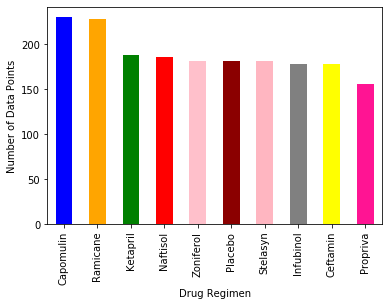

In [46]:
mice_per_regimen_bar=mice_per_regimen.plot(kind="bar",color=["b","orange","g","r","pink","darkred","lightpink","gray","yellow","deeppink"])
mice_per_regimen_bar.set_xlabel("Drug Regimen")
mice_per_regimen_bar.set_ylabel("Number of Data Points")

Text(0, 0.5, 'Count')

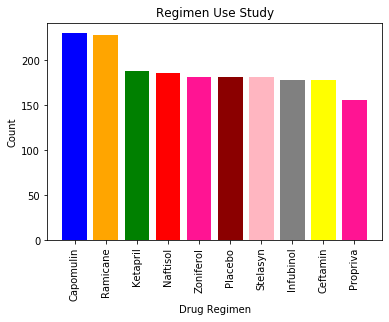

In [47]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot
drugs=["Capomulin","Ramicane","Ketapril","Naftisol","Zoniferol","Placebo","Stelasyn","Infubinol","Ceftamin","Propriva"]
x_axis=np.arange(len(mice_per_regimen))
mice_on_drugs=mice_per_regimen
plt.bar(x_axis, mice_on_drugs, color=["b","orange","g","r","deeppink","darkred","lightpink","gray","yellow","deeppink"], align="center",width=.80,tick_label=drugs,)
plt.xticks(rotation=90)
plt.title("Regimen Use Study")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")


In [48]:
clean_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

Text(0, 0.5, '')

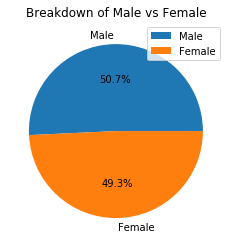

In [49]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_id_count=clean_df["Sex"].value_counts()
sex_id_count
pie_chart_pandas=sex_id_count.plot(kind="pie", legend=True, autopct='%1.1f%%')
pie_chart_pandas.set_title("Breakdown of Male vs Female")
pie_chart_pandas.set_ylabel("")


Text(0, 0.5, 'Sex')

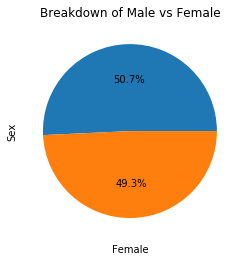

In [50]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_id_count, autopct='%1.1f%%')
plt.title("Breakdown of Male vs Female")
plt.xlabel("Female")
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [51]:
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

In [52]:
max_mouse=clean_df["Timepoint"].max()

In [53]:
clean_df["Timepoint"]==max_mouse
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [54]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_drug_data=clean_df[(clean_df["Drug Regimen"]=="Capomulin")]
capomulin_drug_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [55]:
ramicane_drug_data=clean_df[(clean_df["Drug Regimen"]=="Ramicane")]
ramicane_drug_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
449,w678,Ramicane,Female,5,24,5,43.166373,0
450,y449,Ramicane,Male,19,24,0,45.000000,0
451,y449,Ramicane,Male,19,24,5,45.877545,0
452,y449,Ramicane,Male,19,24,10,46.378092,0


In [56]:
infubinol_drug_data=clean_df[(clean_df["Drug Regimen"]=="Infubinol")]
infubinol_drug_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
454,a203,Infubinol,Female,20,23,0,45.000000,0
455,a203,Infubinol,Female,20,23,5,48.508468,0
456,a203,Infubinol,Female,20,23,10,51.852437,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
458,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


In [58]:
# Locate the rows which contain mice on each drug and get the tumor volumes
ceftamin_drug_data=clean_df[(clean_df["Drug Regimen"]=="Ceftamin")]
ceftamin_drug_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
484,a275,Ceftamin,Female,20,28,0,45.000000,0
485,a275,Ceftamin,Female,20,28,5,46.795257,0
486,a275,Ceftamin,Female,20,28,10,47.371343,0
487,a275,Ceftamin,Female,20,28,15,49.734404,0
488,a275,Ceftamin,Female,20,28,20,50.513437,1
...,...,...,...,...,...,...,...,...
1851,y865,Ceftamin,Male,23,26,25,57.173538,2
1852,y865,Ceftamin,Male,23,26,30,59.033275,3
1853,y865,Ceftamin,Male,23,26,35,61.153140,3
1854,y865,Ceftamin,Male,23,26,40,63.469549,3


In [59]:

merged_df_drug=(ceftamin_drug_data,infubinol_drug_data,ramicane_drug_data,capomulin_drug_data)
merged_df_drug

(     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
 484      a275     Ceftamin  Female          20          28          0   
 485      a275     Ceftamin  Female          20          28          5   
 486      a275     Ceftamin  Female          20          28         10   
 487      a275     Ceftamin  Female          20          28         15   
 488      a275     Ceftamin  Female          20          28         20   
 ...       ...          ...     ...         ...         ...        ...   
 1851     y865     Ceftamin    Male          23          26         25   
 1852     y865     Ceftamin    Male          23          26         30   
 1853     y865     Ceftamin    Male          23          26         35   
 1854     y865     Ceftamin    Male          23          26         40   
 1855     y865     Ceftamin    Male          23          26         45   
 
       Tumor Volume (mm3)  Metastatic Sites  
 484            45.000000                 0  
 485            46

In [60]:
# Put treatments into a list for for loop (and later for plot labels)
list_treatments=["Capomulin","Ramicane","Ketapril","Naftisol","Zoniferol","Placebo","Stelasyn","Infubinol","Ceftamin","Propriva"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol=[]
mouse_weight=[]

In [61]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
for mouse in merged_df_drug:
    tumor_vol.append(mouse["Tumor Volume (mm3)"])
    mouse_weight.append(mouse["Weight (g)"])
print(tumor_vol)

[484     45.000000
485     46.795257
486     47.371343
487     49.734404
488     50.513437
          ...    
1851    57.173538
1852    59.033275
1853    61.153140
1854    63.469549
1855    64.729837
Name: Tumor Volume (mm3), Length: 178, dtype: float64, 454     45.000000
455     48.508468
456     51.852437
457     52.777870
458     55.173336
          ...    
1868    54.316407
1869    56.286750
1870    58.628399
1871    60.053740
1872    62.754451
Name: Tumor Volume (mm3), Length: 178, dtype: float64, 0      45.000000
1      38.825898
2      35.014271
3      34.223992
4      32.997729
         ...    
449    43.166373
450    45.000000
451    45.877545
452    46.378092
453    44.183451
Name: Tumor Volume (mm3), Length: 228, dtype: float64, 10      45.000000
11      43.878496
12      37.614948
13      38.177232
14      36.866876
          ...    
440     47.685963
1452    45.000000
1453    45.597064
1454    46.059608
1455    46.539206
Name: Tumor Volume (mm3), Length: 230, dtype: float64

In [62]:
print(mouse_weight)

[484     28
485     28
486     28
487     28
488     28
        ..
1851    26
1852    26
1853    26
1854    26
1855    26
Name: Weight (g), Length: 178, dtype: int64, 454     23
455     23
456     23
457     23
458     23
        ..
1868    25
1869    25
1870    25
1871    25
1872    25
Name: Weight (g), Length: 178, dtype: int64, 0      16
1      16
2      16
3      16
4      16
       ..
449    24
450    24
451    24
452    24
453    24
Name: Weight (g), Length: 228, dtype: int64, 10      17
11      17
12      17
13      17
14      17
        ..
440     24
1452    25
1453    25
1454    25
1455    25
Name: Weight (g), Length: 230, dtype: int64]


In [63]:
tumor_df=pd.DataFrame(tumor_vol[0])
tumor_df

,Tumor Volume (mm3)
484,45.000000
485,46.795257
486,47.371343
487,49.734404
488,50.513437
...,...
1851,57.173538
1852,59.033275
1853,61.153140
1854,63.469549


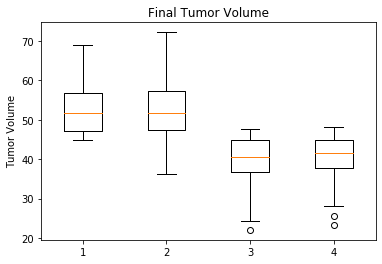

In [71]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(tumor_vol)
plt.show()
tumor_df=pd.DataFrame(tumor_vol[0])
median=tumor_df["Tumor Volume (mm3)"].median()
quartiles=tumor_df["Tumor Volume (mm3)"].quantile([.25,.5,0.75])
lowerq=quartiles[.25]
upperq=quartiles[.75]
iqr=upperq-lowerq
lowerbound=lowerq-(1.5*iqr)
upperbound=upperq+(1.5*iqr)

In [72]:
# Locate the rows which contain mice on each drug and get the tumor volumesquartiles
# If the data is in a dataframe, we use pandas to give quartile calculations

print(f'The upper quartile of tumor volume is {upperq}')
print(f'The lower quartile of tumor volume is {lowerq}')
print(f'The median quartile of tumor volume is {median}')
print(f'The iqr quartile of tumor volume is {iqr}')
print(f'Values below {lowerbound} could be outliers')
print(f'Values above {upperbound} could be outliers')

The upper quartile of tumor volume is 56.801437570000004
The lower quartile of tumor volume is 47.208427112500004
The median quartile of tumor volume is 51.77615728000001
The iqr quartile of tumor volume is 9.5930104575
Values below 32.818911426250004 could be outliers
Values above 71.19095325625 could be outliers


## Line and Scatter Plots

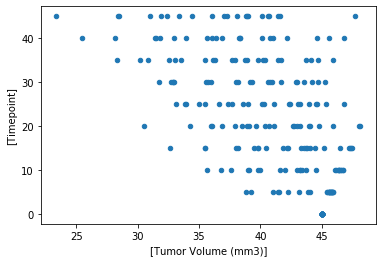

In [73]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_drug_data.plot(kind="scatter",x=["Tumor Volume (mm3)"], y=["Timepoint"])

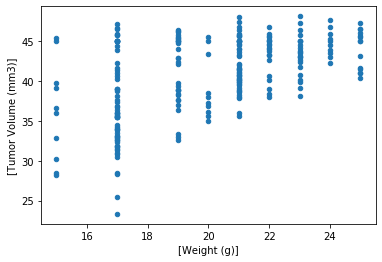

In [74]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_drug_data.plot(kind="scatter",x=["Weight (g)"],y=["Tumor Volume (mm3)"])

## Correlation and Regression

In [75]:
capomulin_drug_data.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [81]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weight=capomulin_drug_data["Weight (g)"]
tumor=capomulin_drug_data["Tumor Volume (mm3)"]
correlation=st.pearsonr(weight,tumor)
print(f"The correlation between weight and tumor volume is {round(correlation[0],2)}")

The correlation between weight and tumor volume is 0.53


Text(10, 50, 'y = 0.96x + 21.49')

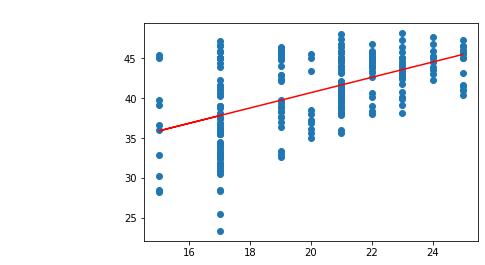

In [92]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight,tumor)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight,tumor)
plt.plot(weight,regress_values,"r")
plt.annotate(line_eq,(10,50),fontsize=15,color="red")